# Use Langchain's GitLoader for fetching the target github repo and branch 

In [1]:
from langchain_community.document_loaders import GitLoader
from langchain_text_splitters import (
    Language,
    RecursiveCharacterTextSplitter,
)
import pandas as pd
import numpy as np
from markdownify import markdownify as md

In [6]:
loader = GitLoader(
    clone_url="https://github.com/microsoft/AI-For-Beginners",
    repo_path="./local_repo",
    branch="main",
)

python_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.PYTHON, chunk_size=2_500, chunk_overlap=250
)

text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=2_500,
    chunk_overlap=250,
    length_function=len,
    is_separator_regex=False,
)

docs = loader.load()
print(f"Number of fetched docs: {len(docs)}.")

Number of fetched docs: 196.


In [10]:
documents = text_splitter.create_documents([docs[0].page_content])
len(documents)

3

In [11]:
documents

[Document(metadata={}, page_content="## Ignore Visual Studio temporary files, build results, and\n## files generated by popular Visual Studio add-ons.\n##\n## Get latest from https://github.com/github/gitignore/blob/master/VisualStudio.gitignore\n\n# virtual environment\nvenv/\nENV/\n\n# ignore all pdf creation files\npackage.json\npackage-lock.json\ndocsifytopdf.js\ndocs/_sidebar.md\n\n# User-specific files\n*.rsuser\n*.suo\n*.user\n*.userosscache\n*.sln.docstates\n\n# User-specific files (MonoDevelop/Xamarin Studio)\n*.userprefs\n\n.ipynb_checkpoints/\n.vector_cache/\n\n# Mono auto generated files\nmono_crash.*\n\n# Build results\n[Dd]ebug/\n[Dd]ebugPublic/\n[Rr]elease/\n[Rr]eleases/\nx64/\nx86/\n[Aa][Rr][Mm]/\n[Aa][Rr][Mm]64/\nbld/\n[Bb]in/\n[Oo]bj/\n[Ll]og/\n[Ll]ogs/\n\n# Visual Studio 2015/2017 cache/options directory\n.vs/\n# Visual Studio Code cache/options directory\n.vscode/\n# Uncomment if you have tasks that create the project's static files in wwwroot\n#wwwroot/\n\n# Visual

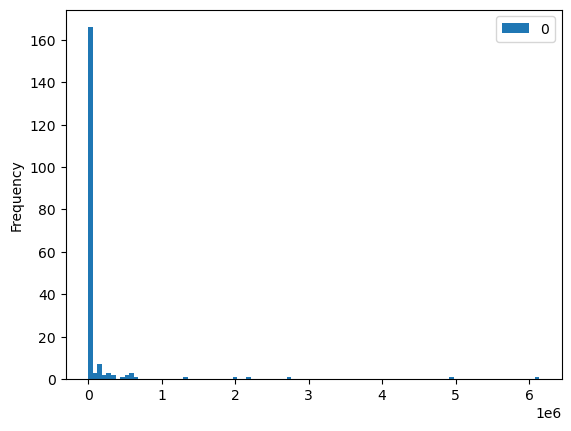

In [3]:
sizes = []
for i in docs:
    sizes.append(len(i.page_content))

pd.DataFrame(sizes).plot(kind='hist', bins=100);

In [35]:
# remove outliers
docs = [doc for doc in docs if len(doc.page_content) < 100_000]

print(f"Number of kept fetched docs (length of characters is less that 50,000): {len(docs)}.")

Number of kept fetched docs (length of characters is less that 50,000): 168.


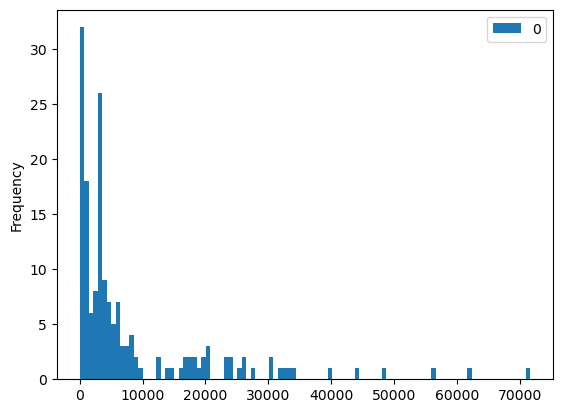

In [36]:
sizes = []
for i in docs:
    sizes.append(len(i.page_content))

pd.DataFrame(sizes).plot(kind='hist', bins=100);

In [37]:
np.mean(sizes), np.median(sizes), np.std(sizes)

(8309.380952380952, 3297.0, 12144.590947555487)

In [38]:
docs[0].page_content[0:150]

'## Ignore Visual Studio temporary files, build results, and\n## files generated by popular Visual Studio add-ons.\n##\n## Get latest from https://github.'

In [39]:
docs[0].metadata

{'source': '.gitignore',
 'file_path': '.gitignore',
 'file_name': '.gitignore',
 'file_type': ''}

## Target the .README files

Number of README docs: 42.


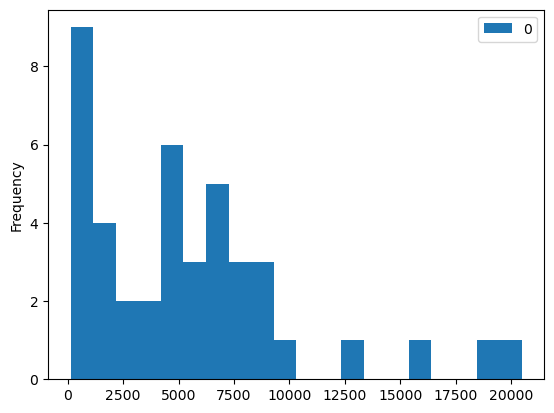

In [40]:
sizes = []
c = 0    
readme = []

for i in docs:
    if i.metadata['source'].endswith('README.md'):
        sizes.append(len(i.page_content))
        readme.append(i)
        c += 1

pd.DataFrame(sizes).plot(kind='hist', bins=20);

print(f"Number of README docs: {c}.")

In [41]:
np.array(sizes).mean(), np.array(sizes).min(), np.array(sizes).max()

(5456.738095238095, 129, 20476)

In [43]:
readme[0].page_content[0:300]

'[![GitHub license](https://img.shields.io/github/license/microsoft/AI-For-Beginners.svg)](https://github.com/microsoft/AI-For-Beginners/blob/main/LICENSE)\n[![GitHub contributors](https://img.shields.io/github/contributors/microsoft/AI-For-Beginners.svg)](https://GitHub.com/microsoft/AI-For-Beginners'

In [45]:
print(md(readme[10].page_content[0:300]))

\# Introduction to Neural Networks: Perceptron

\#\# \[Pre\-lecture quiz](https://red\-field\-0a6ddfd03\.1\.azurestaticapps.net/quiz/103\)

One of the first attempts to implement something similar to a modern neural network was done by Frank Rosenblatt from Cornell Aeronautical Laboratory in 1957\. It was a ha


In [56]:
readme[40].metadata

{'source': 'lessons/5-NLP/19-NER/lab/README.md',
 'file_path': 'lessons/5-NLP/19-NER/lab/README.md',
 'file_name': 'README.md',
 'file_type': '.md'}

In [47]:
for _,i in enumerate(readme):
    if readme[_].metadata['source'] != readme[_].metadata['file_path']:
        print(i)
    if readme[_].metadata['file_name'] != 'README.md':
        print(i)
    if readme[_].metadata['file_type'] != '.md':
        print(i)

In [57]:
files = []

for _,i in enumerate(readme):
    files.append(readme[_].metadata['source'])
files

['README.md',
 'lessons/README.md',
 'etc/quiz-app/README.md',
 'lessons/1-Intro/README.md',
 'lessons/2-Symbolic/README.md',
 'lessons/3-NeuralNetworks/README.md',
 'lessons/4-ComputerVision/README.md',
 'lessons/5-NLP/README.md',
 'lessons/7-Ethics/README.md',
 'lessons/sketchnotes/README.md',
 'lessons/3-NeuralNetworks/03-Perceptron/README.md',
 'lessons/3-NeuralNetworks/04-OwnFramework/README.md',
 'lessons/3-NeuralNetworks/05-Frameworks/README.md',
 'lessons/4-ComputerVision/06-IntroCV/README.md',
 'lessons/4-ComputerVision/07-ConvNets/README.md',
 'lessons/4-ComputerVision/08-TransferLearning/README.md',
 'lessons/4-ComputerVision/09-Autoencoders/README.md',
 'lessons/4-ComputerVision/10-GANs/README.md',
 'lessons/4-ComputerVision/11-ObjectDetection/README.md',
 'lessons/4-ComputerVision/12-Segmentation/README.md',
 'lessons/5-NLP/13-TextRep/README.md',
 'lessons/5-NLP/14-Embeddings/README.md',
 'lessons/5-NLP/15-LanguageModeling/README.md',
 'lessons/5-NLP/16-RNN/README.md',
 'l

In [59]:
readme[0]

Document(metadata={'source': 'README.md', 'file_path': 'README.md', 'file_name': 'README.md', 'file_type': '.md'}, page_content='[![GitHub license](https://img.shields.io/github/license/microsoft/AI-For-Beginners.svg)](https://github.com/microsoft/AI-For-Beginners/blob/main/LICENSE)\n[![GitHub contributors](https://img.shields.io/github/contributors/microsoft/AI-For-Beginners.svg)](https://GitHub.com/microsoft/AI-For-Beginners/graphs/contributors/)\n[![GitHub issues](https://img.shields.io/github/issues/microsoft/AI-For-Beginners.svg)](https://GitHub.com/microsoft/AI-For-Beginners/issues/)\n[![GitHub pull-requests](https://img.shields.io/github/issues-pr/microsoft/AI-For-Beginners.svg)](https://GitHub.com/microsoft/AI-For-Beginners/pulls/)\n[![PRs Welcome](https://img.shields.io/badge/PRs-welcome-brightgreen.svg?style=flat-square)](http://makeapullrequest.com)\n\n[![GitHub watchers](https://img.shields.io/github/watchers/microsoft/AI-For-Beginners.svg?style=social&label=Watch)](https:/